# Toronto Shelter Occupancy

### Imports

In [3]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### CSV Uploads

In [4]:
df2017 = pd.read_csv("data/Daily shelter occupancy 2017.csv")
df2018 = pd.read_csv("data/Daily shelter occupancy 2018.csv")
df2019 = pd.read_csv("data/Daily shelter occupancy 2019.csv")
df2020 = pd.read_csv("data/Daily shelter occupancy 2020.csv")
df2021 = pd.read_csv("data/daily-shelter-overnight-service-occupancy-capacity-2021.csv")
df2022 = pd.read_csv("data/Daily shelter overnight occupancy.csv")
#df2020updated

### Joining CSVs

In [5]:
# adding the year to spreadsheet for visualizations
df2017['YEAR'] = 2017
df2018['YEAR'] = 2018
df2019['YEAR'] = 2019
df2020['YEAR'] = 2020

In [6]:
# joining CSVs
frames = [df2017, df2018, df2019, df2020]
df = pd.concat(frames)

## Exploratory Analysis

### Data Cleaning

In [7]:
# changing date to datetime format
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

In [8]:
# remove NaN
df = df.fillna(0)
df = df.loc[(df[['CAPACITY']] != 0).all(axis=1)] # .notna() leaves values for whatever reason

In [9]:
# adding occupancy rate to df as I think it would be important for analysis
df['OCCUPANCY_RATE'] = round(((df['OCCUPANCY'] / df['CAPACITY']) *100),2)
df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY,YEAR,OCCUPANCY_RATE
0,1,2017-01-01,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0,2017,100.00
1,2,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0,2017,76.47
2,3,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0,2017,100.00
3,4,2017-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0,2017,94.29
4,5,2017-01-01,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,0,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0,2017,96.67


In [10]:
# checking to see NaN were removed
df3 = df[["OCCUPANCY_DATE", "OCCUPANCY_RATE"]]

is_NaN = df3.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df3[row_has_NaN]
rows_with_NaN

,OCCUPANCY_DATE,OCCUPANCY_RATE


## Initial Visualizations

In [11]:
# reducing dates to "month date" format rather than day/month/year
occupancy = pd.DataFrame(df.groupby(df['OCCUPANCY_DATE'].dt.strftime('%B %Y'))['OCCUPANCY'].sum())
occupancy = occupancy.reset_index()
occupancy.loc[:,'OCCUPANCY_DATE'] = pd.to_datetime(occupancy.loc[:, 'OCCUPANCY_DATE'], format='%B %Y')
occupancy = occupancy.sort_values(by="OCCUPANCY_DATE")

In [12]:
# interesting way to sort occupancy date (unused)
# sorted(occupancy['OCCUPANCY_DATE'], key=lambda day: datetime.strptime(day, "%B %Y"))

Initial graph to better understand how occupancy in shelters have changed between 2017 and 2020
- occupancy increases steadily from 2017 to 2020.
- drastic decline when COVID hits. Could be due to the lack of capacity rather than the lost of need.

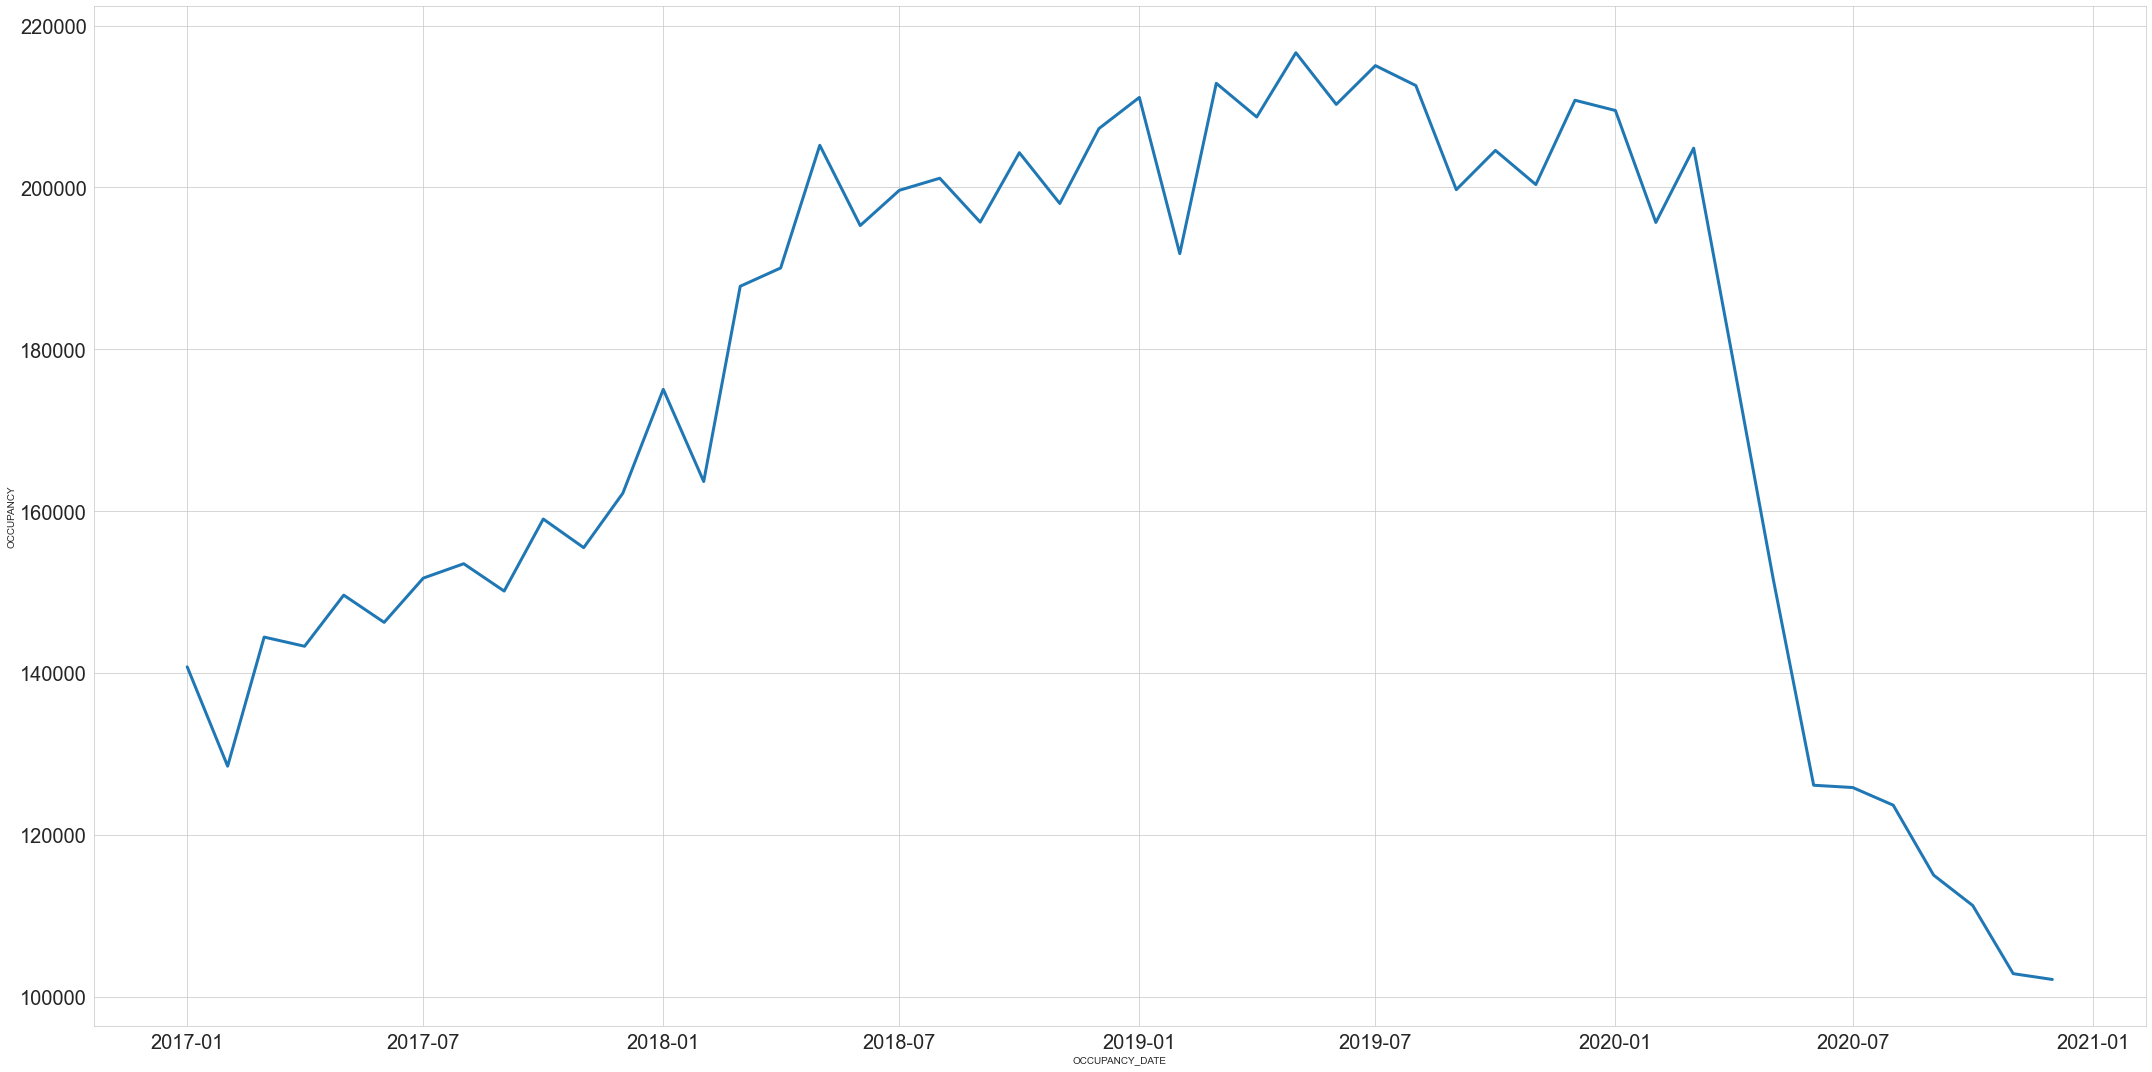

In [13]:
plt.figure(figsize=(30,15), tight_layout=True)
sns.set_style(style='whitegrid')
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY", data=occupancy, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

- Looking at rates of capacity vs. occupancy.
- Rates are more steady between 2017 and 2020. Could indicate an increase in service/capacity rather than an increase in need.
- Similar drastic decline when COVID hit.

In [14]:
# reducing dates to "month date" format rather than day/month/year
df = df.astype({"OCCUPANCY_RATE": int})
occupancy_rate_old = pd.DataFrame(df.groupby(df['OCCUPANCY_DATE'].dt.strftime('%B %Y'))['OCCUPANCY_RATE'].mean())
occupancy_rate_old = occupancy_rate_old.reset_index()
occupancy_rate_old.loc[:,'OCCUPANCY_DATE'] = pd.to_datetime(occupancy_rate_old.loc[:, 'OCCUPANCY_DATE'], 
                                                            format='%B %Y')
occupancy_rate_old = occupancy_rate_old.sort_values(by="OCCUPANCY_DATE")

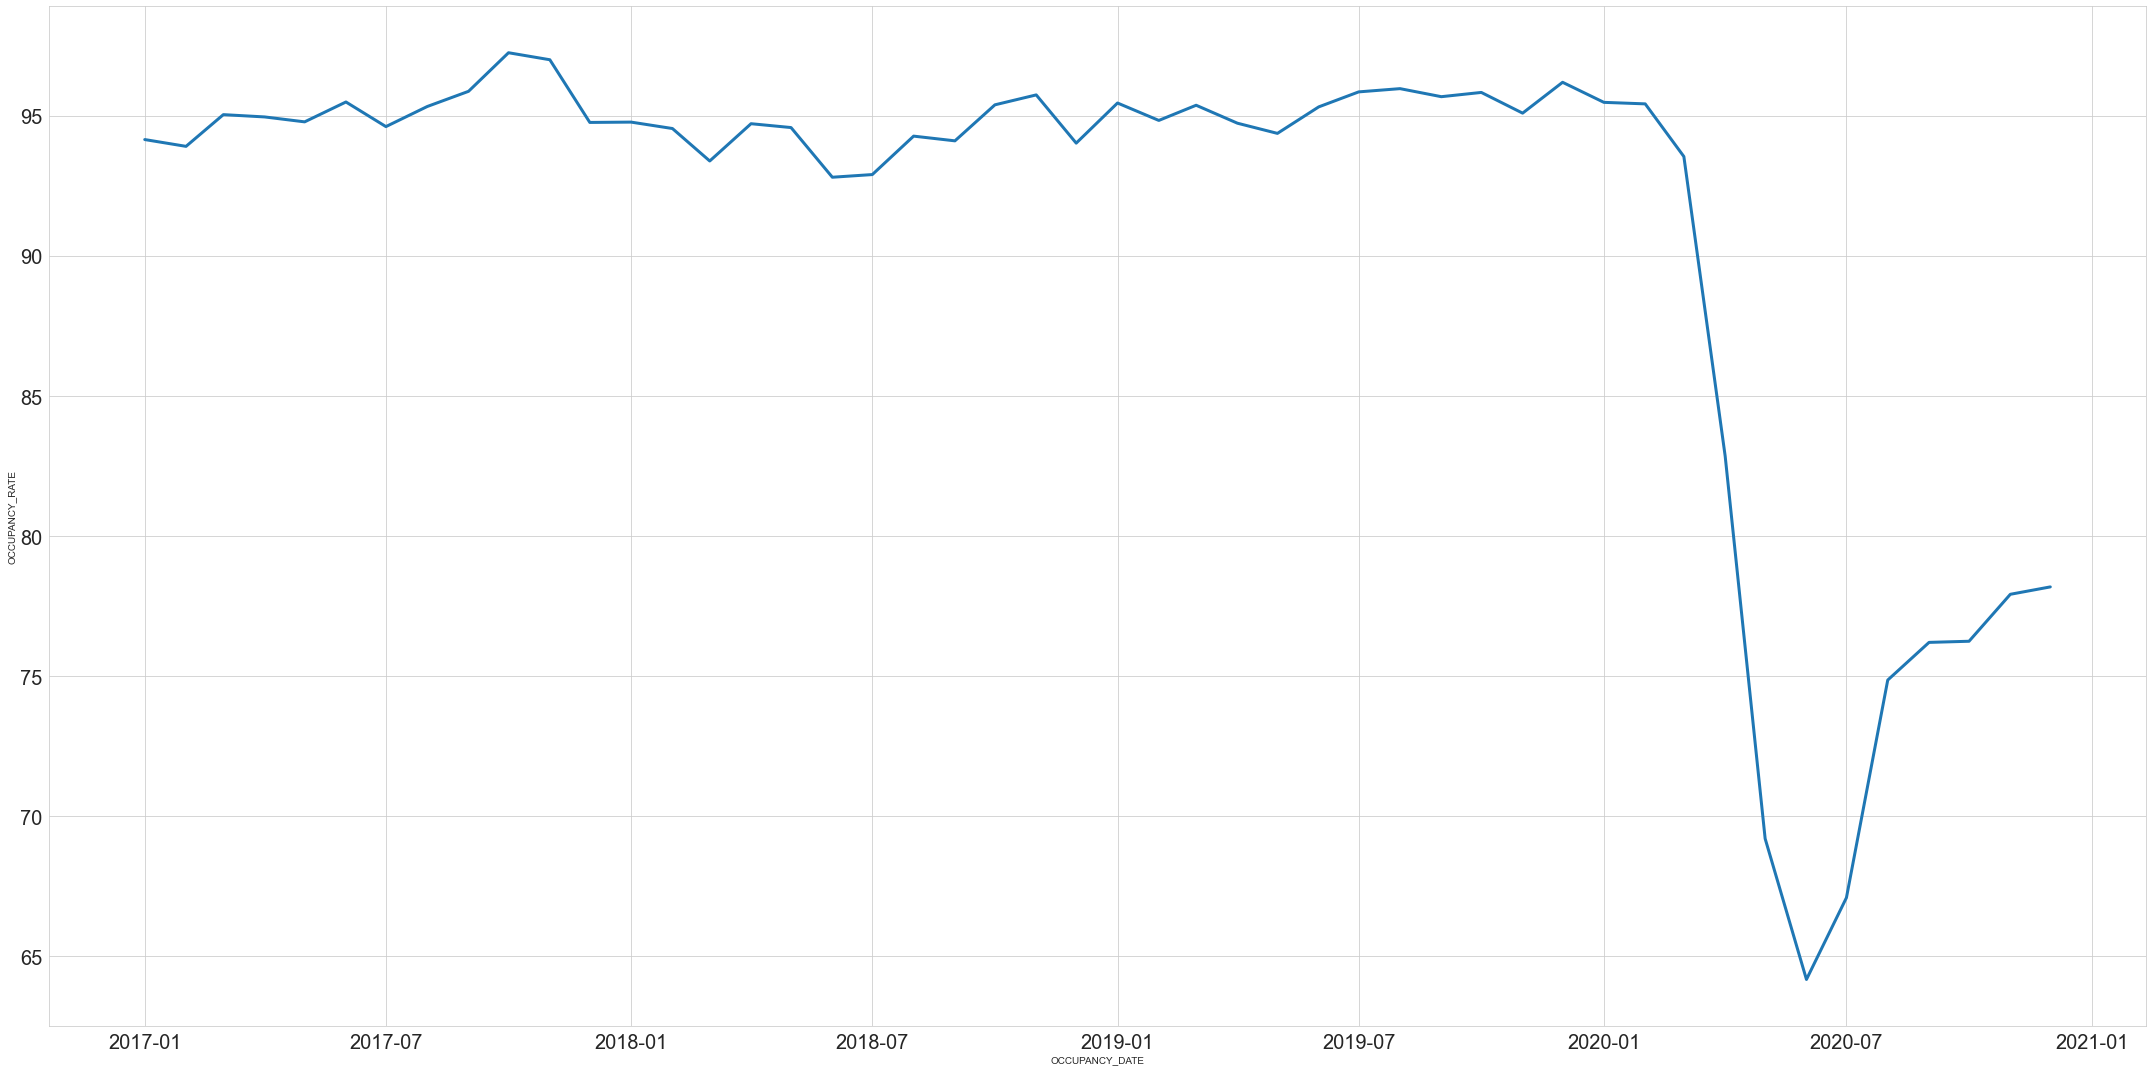

In [15]:
plt.figure(figsize=(30,15), tight_layout=True)
sns.set_style(style='whitegrid')
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY_RATE", data=occupancy_rate_old, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

Looking at DD/MM/YY rather than just MM/YY for more detail

In [16]:
occupancy_rate_detail = pd.DataFrame(df.groupby(df['OCCUPANCY_DATE'])['OCCUPANCY_RATE'].mean())
occupancy_rate_detail

,OCCUPANCY_RATE
OCCUPANCY_DATE,
2017-01-01,93.157895
2017-01-02,91.288660
2017-01-03,91.938776
2017-01-04,93.530000
2017-01-05,94.060000
...,...
2020-12-27,76.595960
2020-12-28,76.797980
2020-12-29,76.484848


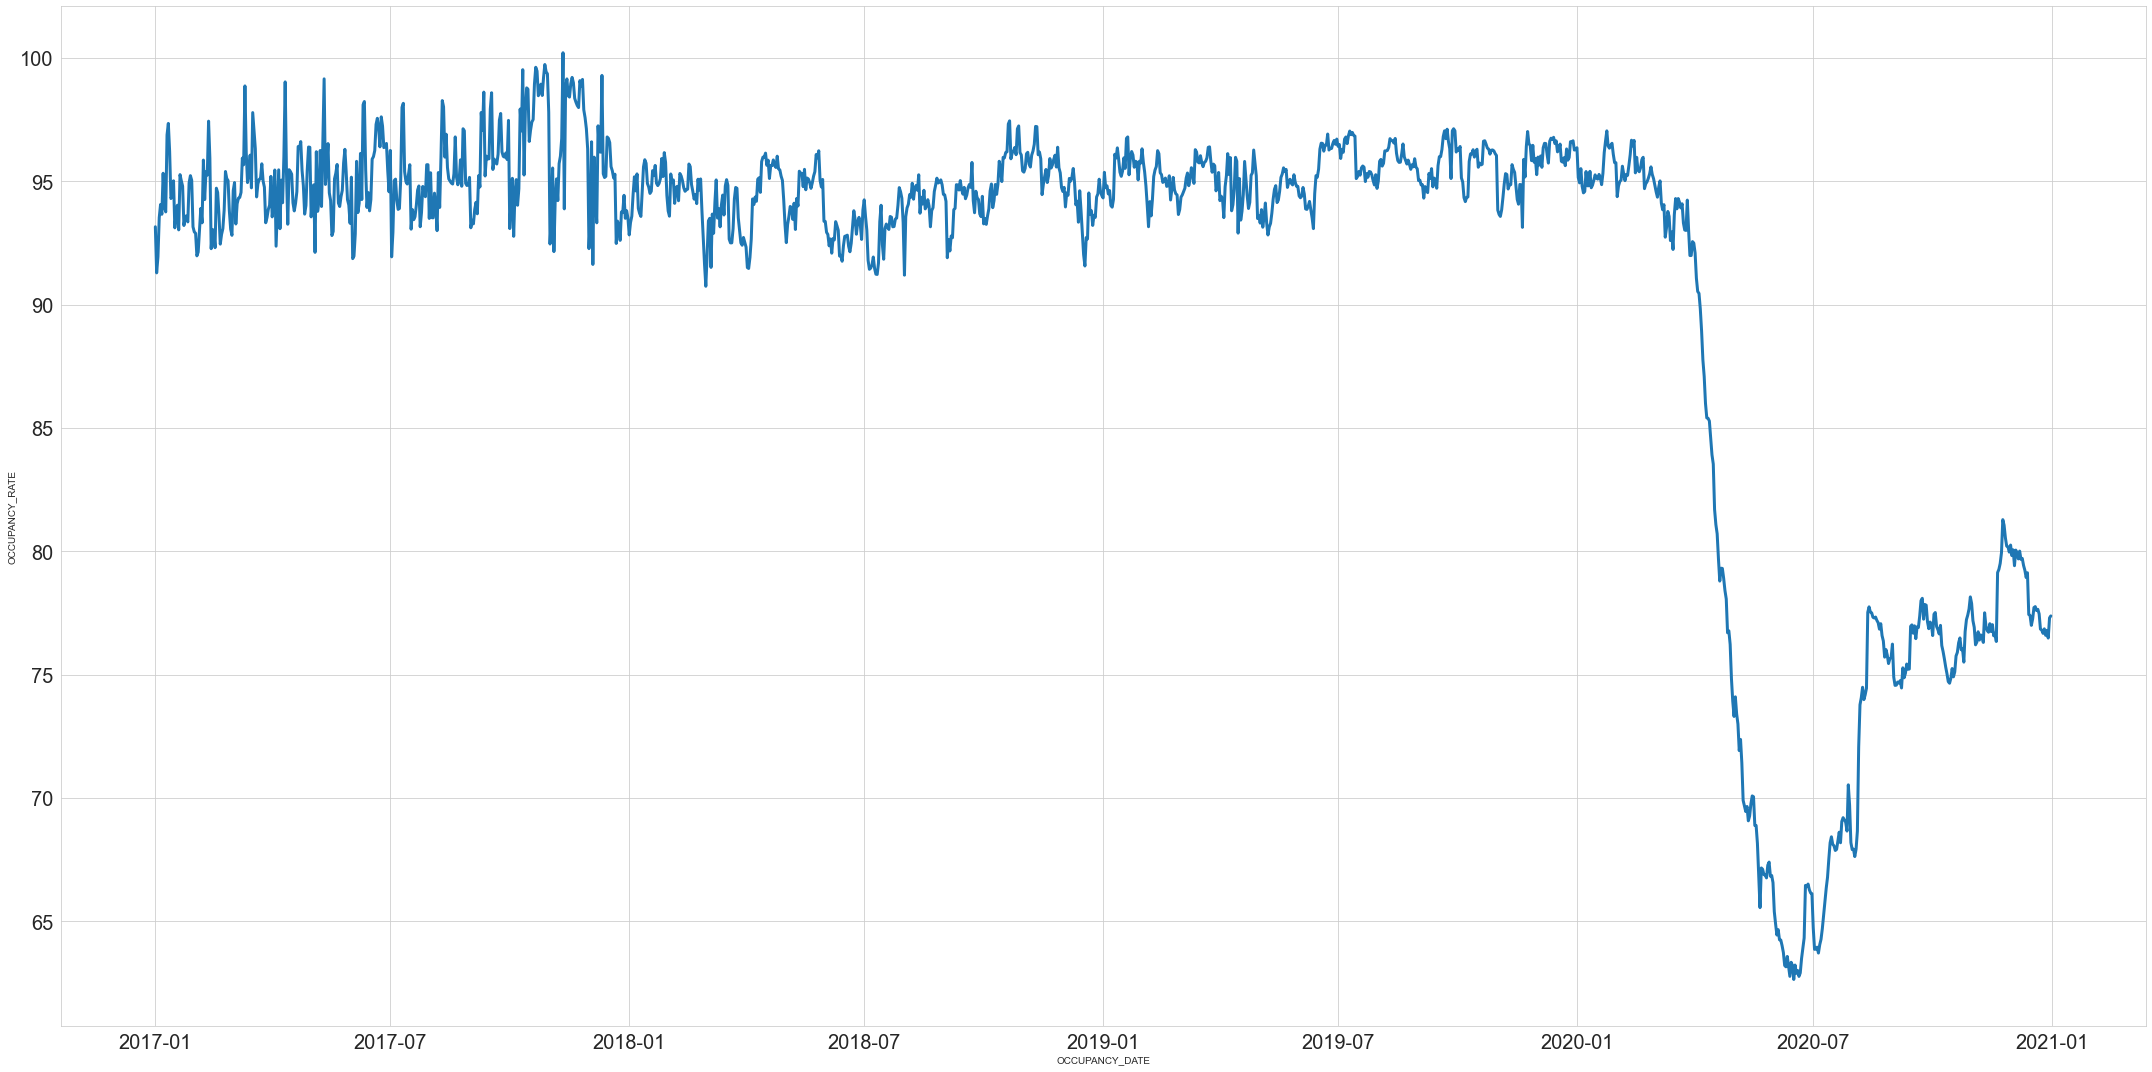

In [17]:
plt.figure(figsize=(30,15), tight_layout=True)
sns.set_style(style='whitegrid')
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY_RATE", data=occupancy_rate_detail, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

Because capacity in shelters have changed due to COVID (fewer beds available for social distancing), the data above for 2020 is not representative of the occupancy rates. Below uses the new data from Open Data Toronto to reflect change of capacity

### Combining 2021-2022 Data with 2017-2019 Data

In [18]:
# fill NaN with 0 to combine bed vs rooms to match the previous dataframes
df2022 = df2022.fillna(0)
df2021 = df2021.fillna(0)

In [19]:
df2022["OCCUPANCY"] = df2022["OCCUPIED_BEDS"] + df2022["OCCUPIED_ROOMS"]
df2022["CAPACITY"] = df2022["CAPACITY_ACTUAL_BED"] + df2022["CAPACITY_ACTUAL_ROOM"]
df2022["OCCUPANCY_RATE"] = df2022["OCCUPANCY_RATE_BEDS"] + df2022["OCCUPANCY_RATE_ROOMS"]

df2021["OCCUPANCY"] = df2021["OCCUPIED_BEDS"] + df2021["OCCUPIED_ROOMS"]
df2021["CAPACITY"] = df2021["CAPACITY_ACTUAL_BED"] + df2021["CAPACITY_ACTUAL_ROOM"]
df2021["OCCUPANCY_RATE"] = df2021["OCCUPANCY_RATE_BEDS"] + df2021["OCCUPANCY_RATE_ROOMS"]

In [20]:
# changing date format of df2021 to match others
def add_year(x):
    return "20" + x

df2021['OCCUPANCY_DATE'] = df2021['OCCUPANCY_DATE'].apply(add_year)

In [21]:
df2021['OCCUPANCY_DATE'] = pd.to_datetime(df2021['OCCUPANCY_DATE'])

In [22]:
# removing shelter identifyers to combine dataframes
df2021num = df2021[["OCCUPANCY_DATE", "LOCATION_POSTAL_CODE", "SECTOR", "OCCUPANCY", "CAPACITY", "OCCUPANCY_RATE"]]
df2022num = df2022[["OCCUPANCY_DATE", "LOCATION_POSTAL_CODE", "SECTOR", "OCCUPANCY", "CAPACITY", "OCCUPANCY_RATE"]]
dfnum = df[["OCCUPANCY_DATE", "SHELTER_POSTAL_CODE", "SECTOR", "OCCUPANCY", "CAPACITY", "OCCUPANCY_RATE"]]

In [23]:
# rename column to match dataframes to combine
dfnum = dfnum.rename(columns={"SHELTER_POSTAL_CODE": "LOCATION_POSTAL_CODE"})

In [24]:
# joining CSVs
updated_frames = [df2021num, df2022num, dfnum]
df2 = pd.concat(updated_frames)

In [25]:
df2

,OCCUPANCY_DATE,LOCATION_POSTAL_CODE,SECTOR,OCCUPANCY,CAPACITY,OCCUPANCY_RATE
0,2021-01-01 00:00:00,M3L 1A5,Families,26.0,29.0,89.66
1,2021-01-01 00:00:00,M3L 1A5,Mixed Adult,3.0,3.0,100.00
2,2021-01-01 00:00:00,M3L 1A5,Men,23.0,28.0,82.14
3,2021-01-01 00:00:00,M3L 1A5,Mixed Adult,17.0,17.0,100.00
4,2021-01-01 00:00:00,M3L 1A5,Women,13.0,14.0,92.86
...,...,...,...,...,...,...
41054,2020-12-31 00:00:00,M4T 1C1,Youth,21.0,24.0,87.00
41057,2020-12-31 00:00:00,M9V 1P9,Youth,11.0,17.0,64.00
41058,2020-12-31 00:00:00,M9V 1P9,Youth,11.0,16.0,68.00
41059,2020-12-31 00:00:00,M1L 4A1,Co-ed,10.0,10.0,100.00


In [26]:
# changing date to datetime format (no seconds)
df2['OCCUPANCY_DATE'] = pd.to_datetime(df2['OCCUPANCY_DATE'])

### Visualizing Occupancy Rates

- 2020 dataset never updated to reflect the capacity changes during COVID
- 2021 dataset reflects the changes = we can see return to average capacity
- Medium increase by mid-2020 with a sharp increae by early 2021 reflecting the correctness of 2021 dataets
- Occupancy rates only begin to reach pre-COVID levels by end of 2021/beginning of 2022

In [27]:
# reducing dates to "month date" format rather than day/month/year
occupancy_rate = pd.DataFrame(df2.groupby(df2['OCCUPANCY_DATE'].dt.strftime('%B %Y'))['OCCUPANCY_RATE'].mean())
occupancy_rate = occupancy_rate.reset_index()
occupancy_rate.loc[:,'OCCUPANCY_DATE'] = pd.to_datetime(occupancy_rate.loc[:, 'OCCUPANCY_DATE'], format='%B %Y')
occupancy_rate = occupancy_rate.sort_values(by="OCCUPANCY_DATE")

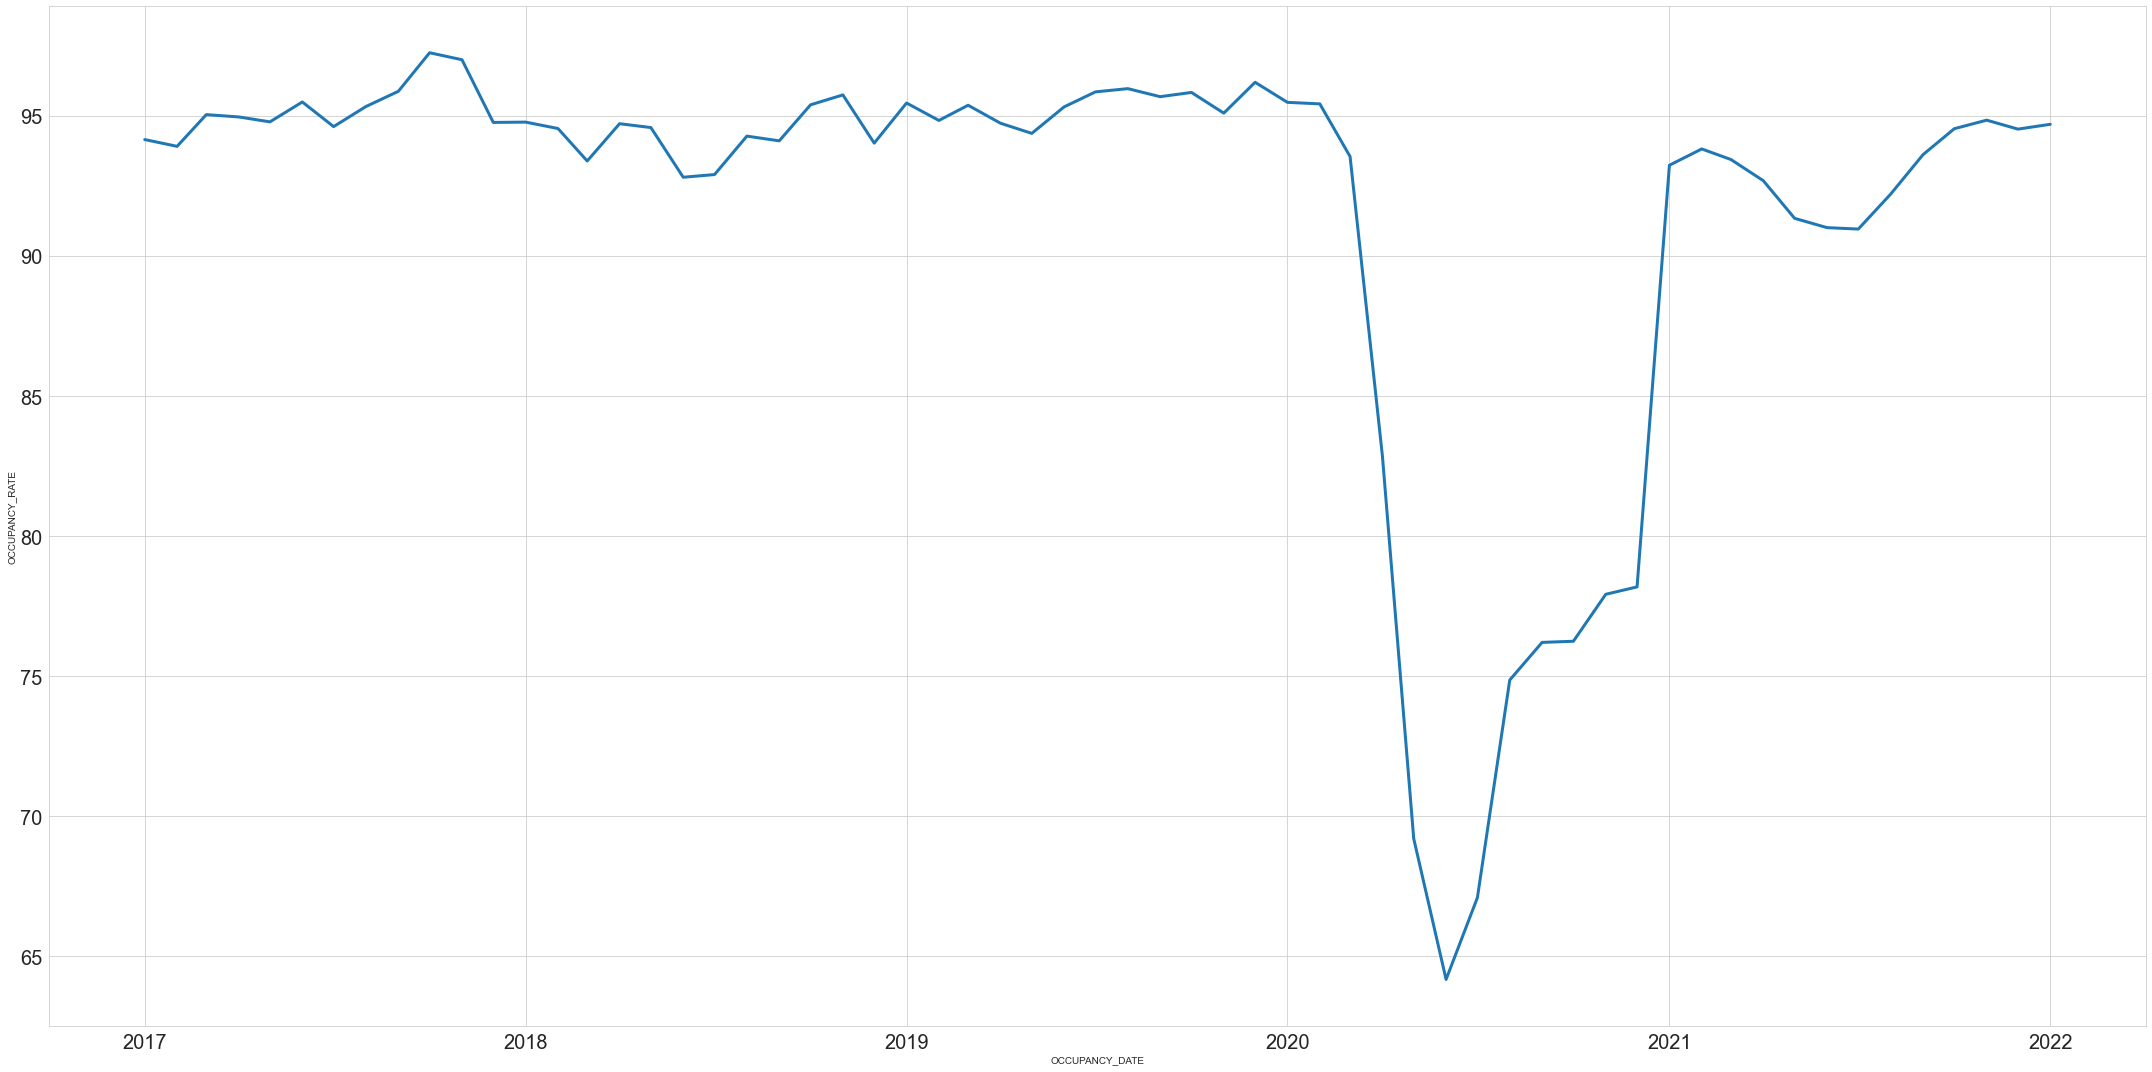

In [28]:
# plotting occupancy rate between 2017 and 2021
plt.figure(figsize=(30,15), tight_layout=True)
sns.set_style(style='whitegrid')
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY_RATE", data=occupancy_rate, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

Looking gain by DD/MM/YY for more details

In [29]:
occupancy_rate_new_detail = pd.DataFrame(df2.groupby(df2['OCCUPANCY_DATE'])['OCCUPANCY_RATE'].mean())

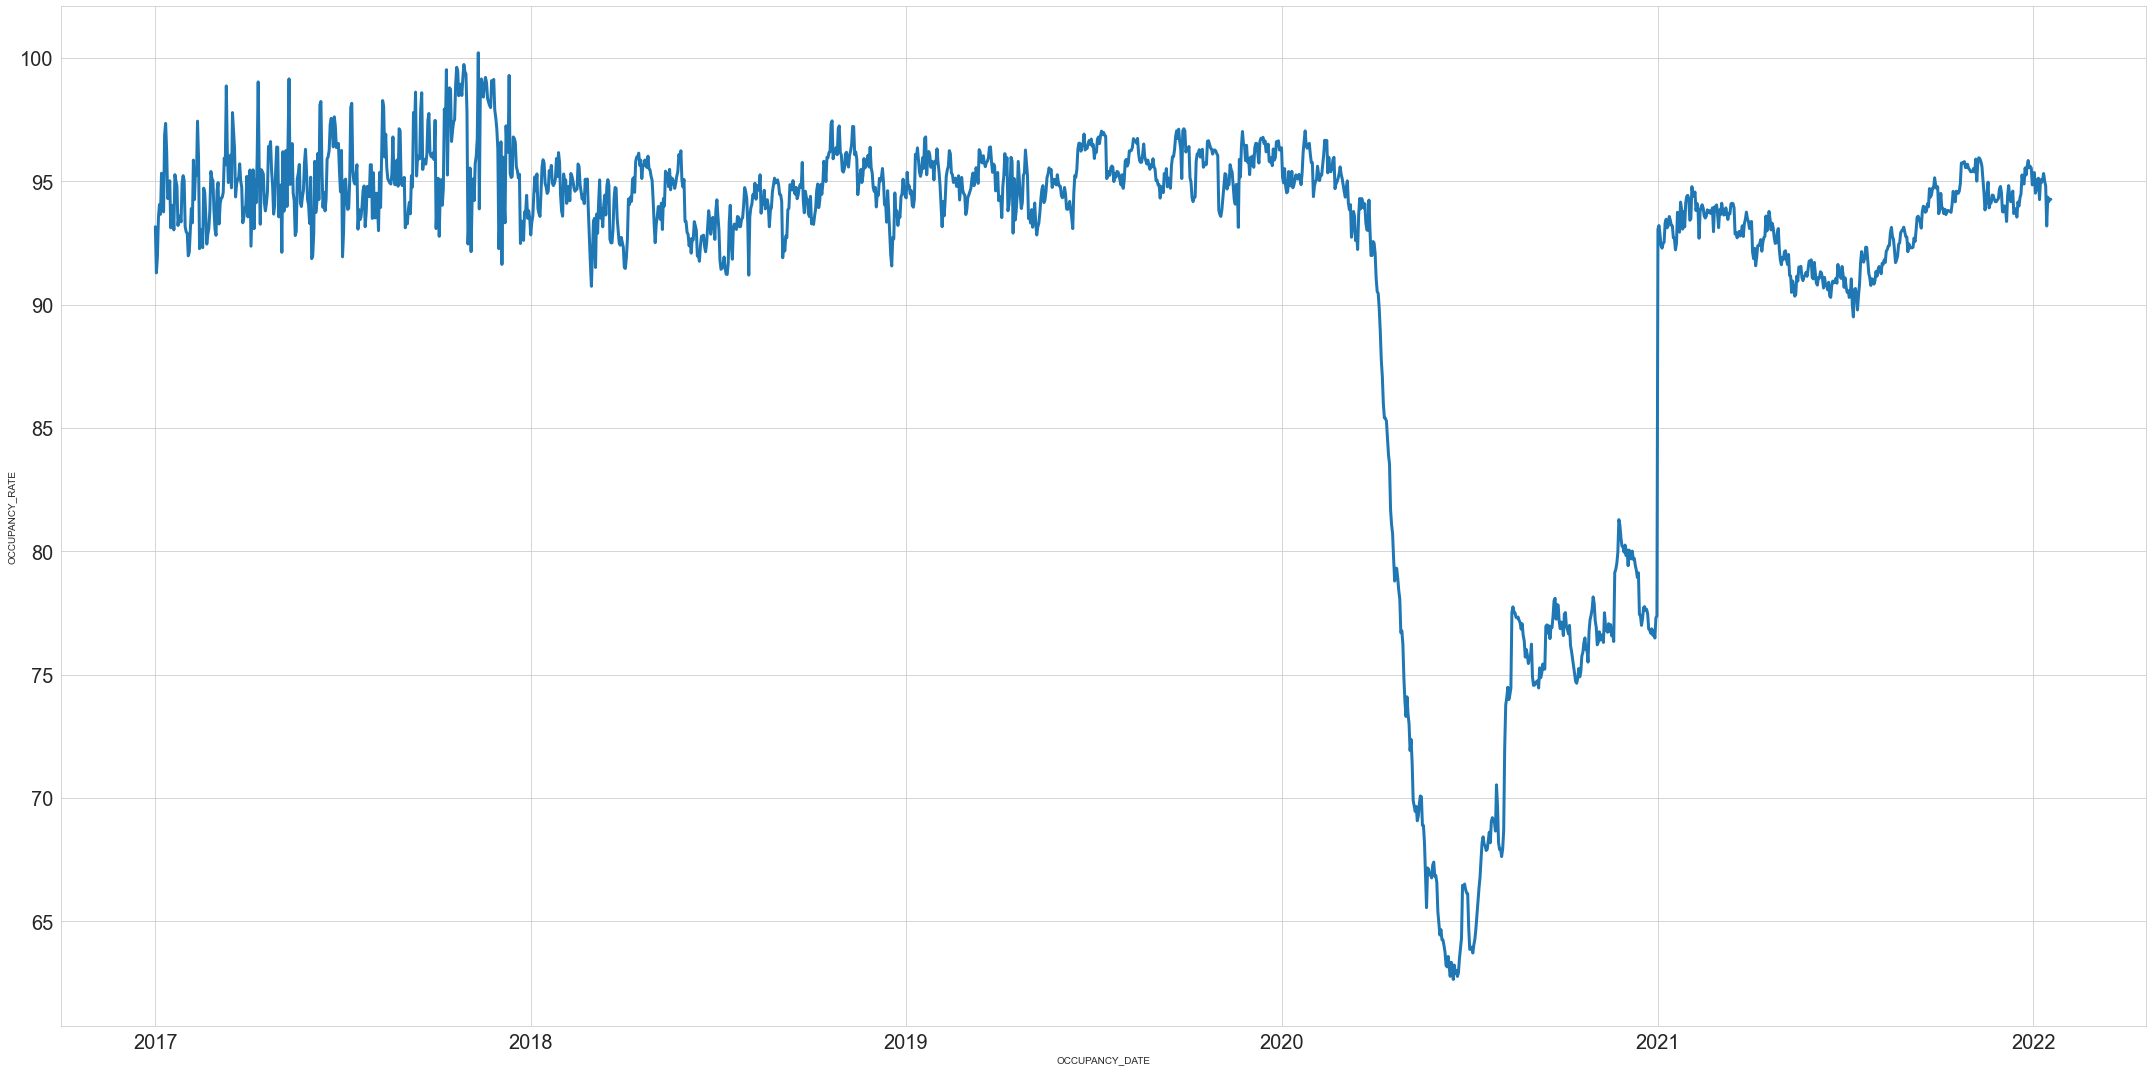

In [30]:
# plotting occupancy rate between 2017 and 2021
plt.figure(figsize=(30,15), tight_layout=True)
sns.set_style(style='whitegrid')
sns.lineplot(x="OCCUPANCY_DATE", y="OCCUPANCY_RATE", data=occupancy_rate_new_detail, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

### Visualizing Sector

In [31]:
# changing "co-ed" of 2017-2020 to match "mixed adult" of 2021-2022 to match each other
def standardize_sector(x):
    if x == "Co-ed":
        return "Mixed Adult"
    else:
        return x

df2['SECTOR'] = df2['SECTOR'].apply(standardize_sector)

In [32]:
df2

,OCCUPANCY_DATE,LOCATION_POSTAL_CODE,SECTOR,OCCUPANCY,CAPACITY,OCCUPANCY_RATE
0,2021-01-01,M3L 1A5,Families,26.0,29.0,89.66
1,2021-01-01,M3L 1A5,Mixed Adult,3.0,3.0,100.00
2,2021-01-01,M3L 1A5,Men,23.0,28.0,82.14
3,2021-01-01,M3L 1A5,Mixed Adult,17.0,17.0,100.00
4,2021-01-01,M3L 1A5,Women,13.0,14.0,92.86
...,...,...,...,...,...,...
41054,2020-12-31,M4T 1C1,Youth,21.0,24.0,87.00
41057,2020-12-31,M9V 1P9,Youth,11.0,17.0,64.00
41058,2020-12-31,M9V 1P9,Youth,11.0,16.0,68.00
41059,2020-12-31,M1L 4A1,Mixed Adult,10.0,10.0,100.00


Looking at date of occupancy by sector (ex. families, men, women, etc.)
- families seems over capacity between 2017 and 2018
- 2018 onwards, each sector sees similar patterns

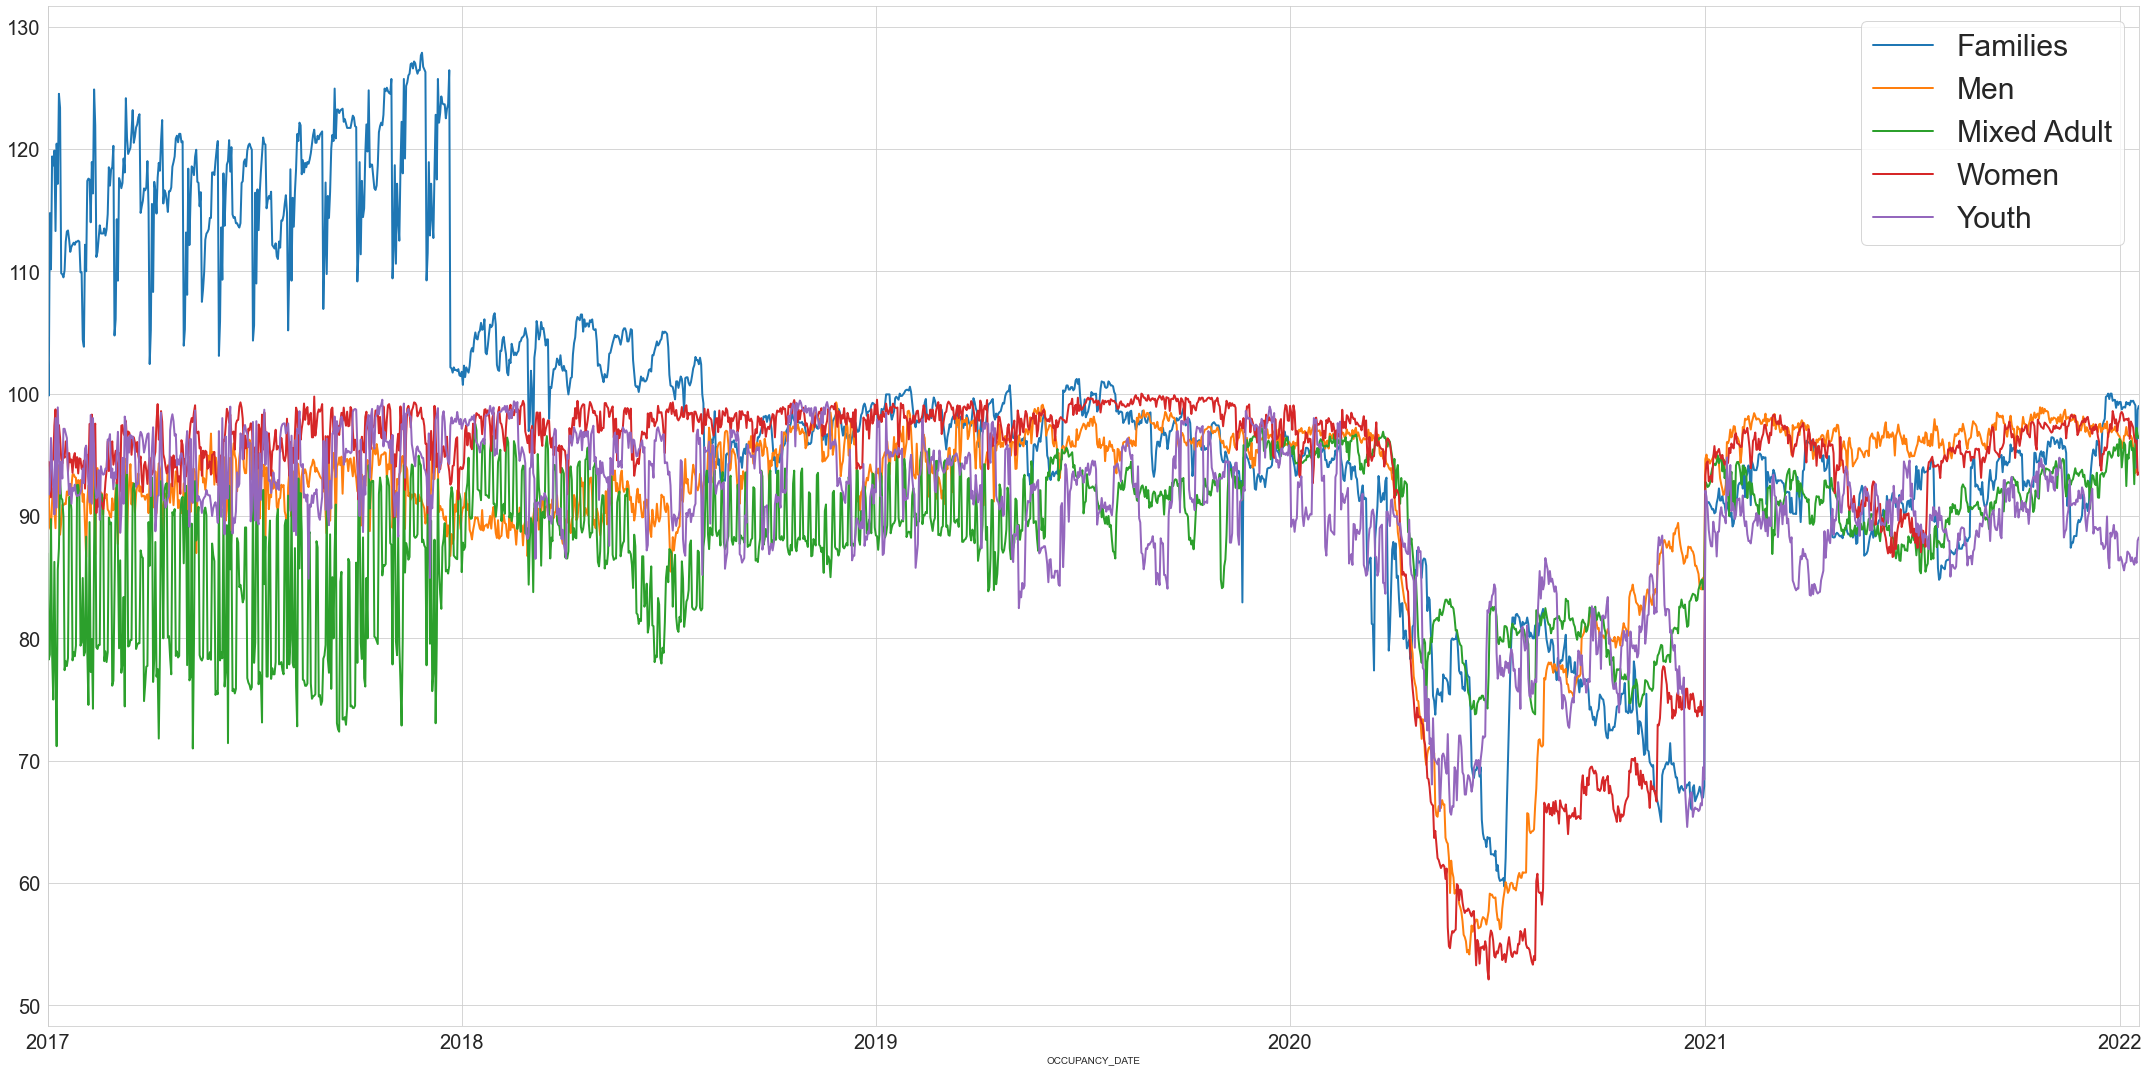

In [42]:
fig, ax = plt.subplots(figsize=(30,15), tight_layout=True)

df2.groupby(['OCCUPANCY_DATE','SECTOR']).mean()['OCCUPANCY_RATE'].unstack().plot(ax=ax, linewidth=2)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=30);

Confirming that over occupancy in families is high.
- Family sectors are over 3x over capacity

In [38]:
df2.loc[df2['OCCUPANCY_RATE'] > 100]

,OCCUPANCY_DATE,LOCATION_POSTAL_CODE,SECTOR,OCCUPANCY,CAPACITY,OCCUPANCY_RATE
23013,2021-06-11,M4P 2L2,Mixed Adult,80.0,79.0,101.27
24536,2021-06-22,M4P 2L2,Mixed Adult,72.0,71.0,101.41
24675,2021-06-23,M4P 2L2,Mixed Adult,74.0,73.0,101.37
24814,2021-06-24,M4P 2L2,Mixed Adult,72.0,71.0,101.41
5,2017-01-01,M1P 4V8,Families,168.0,160.0,105.00
...,...,...,...,...,...,...
40550,2020-12-27,M1E 2M6,Families,61.0,20.0,305.00
40656,2020-12-28,M1E 2M6,Families,61.0,20.0,305.00
40762,2020-12-29,M1E 2M6,Families,59.0,20.0,295.00
40866,2020-12-30,M1E 2M6,Families,59.0,20.0,295.00


Plotting the occupancy date by sector based on the sum of occupancy. We can see there is a big difference between 2020 and 2021 in the pattern:
- Massive increase in Mixed Adults occupancy compared to 2019 despite adjusting for COVID capacity in new datasets
- Drastic decrease in Family occupancy from 2019 to 2021
- Every other sector only sees slight differences
- Steady Family occupancy increase from 2017-2019 before poor data in 2020 changes scales

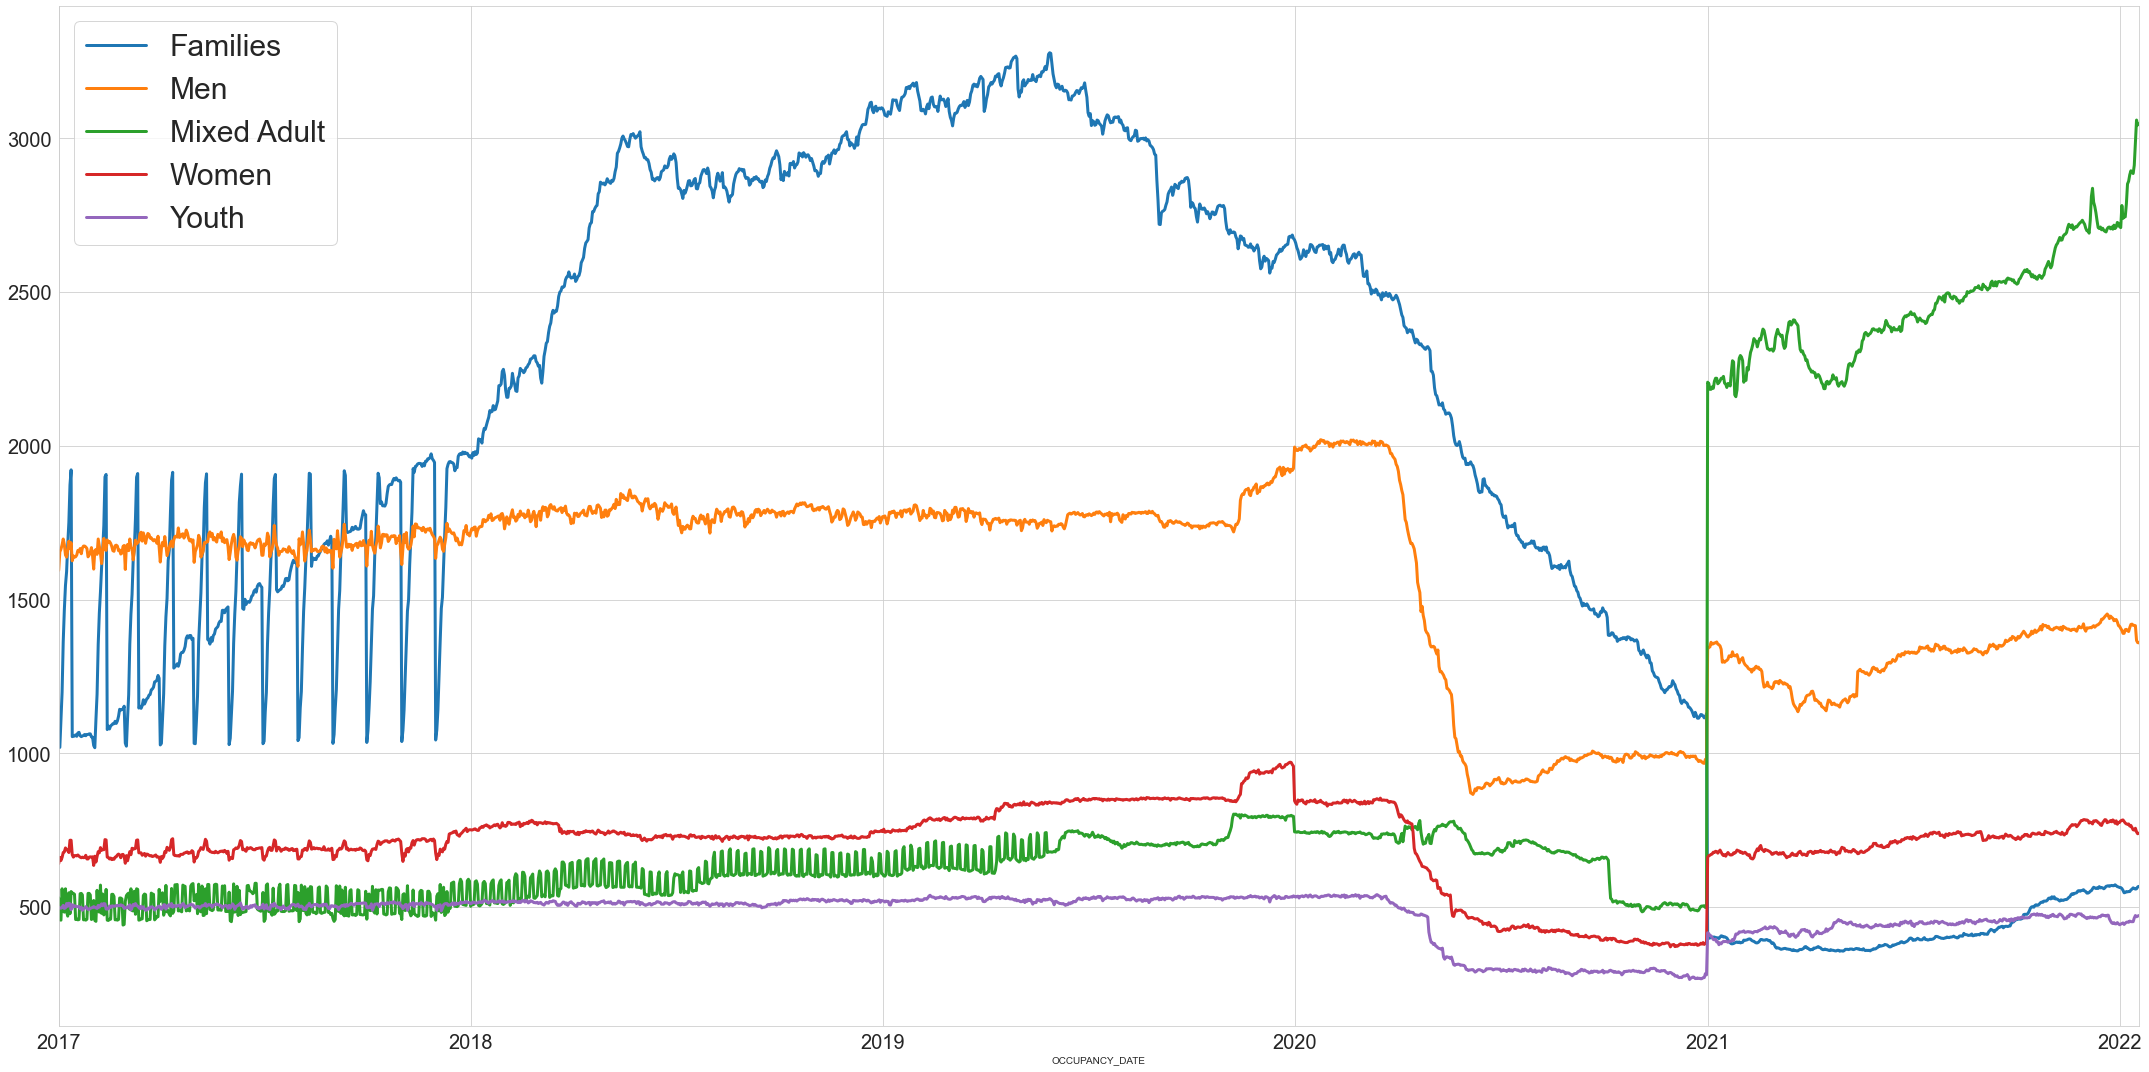

In [40]:
fig, ax = plt.subplots(figsize=(30,15), tight_layout=True)

df2.groupby(['OCCUPANCY_DATE','SECTOR']).sum()['OCCUPANCY'].unstack().plot(ax=ax, linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.legend(fontsize=30);